In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
from IPython.core.display import HTML
%matplotlib inline
from tensorboard.plugins import projector
import os
from tensorflow.keras.callbacks import ModelCheckpoint


current_dir = os.getcwd()
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

print(current_dir)
print(tf.__version__)


Instructions for updating:
non-resource variables are not supported in the long term
C:\Users\kev70
2.13.0


In [2]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()



# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten the test data
image_test = X_test.reshape(X_test.shape[0], -1)

# Assuming you want to preprocess a subset of the test data
embed_count = 2500
image_test = image_test[:embed_count]
label_test = y_test[:embed_count]


In [3]:
print(image_test.shape)

(2500, 784)


In [4]:
# Create a summary writer for TensorBoard
summary_writer = tf.summary.FileWriter(r'C:\Users\kev70\CPS')
embedding_var = tf.Variable(image_test, name='digit_embedding')

logdir = r'C:\Users\kev70\CPS'
# logdir = PATH + '/mnist_logs'

In [5]:
# Configure the embedding visualization
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name
embedding.metadata_path = os.path.join(logdir, 'metadata.tsv')
embedding.sprite.image_path = os.path.join(logdir, 'sprite.png')
embedding.sprite.single_image_dim.extend([28, 28])

In [6]:
# Visualize the embeddings in TensorBoard
projector.visualize_embeddings(summary_writer, config)

with tf.Session() as sesh:
    sesh.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.save(sesh, os.path.join(logdir, 'model.ckpt'))

rows = 28
cols = 28
label = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
sprite_dim = int(np.sqrt(image_test.shape[0]))
sprite_image = np.ones((cols * sprite_dim, rows * sprite_dim))
index = 0
labels = []

In [7]:
# Generate metadata and sprite image for embedding visualization
for i in range(sprite_dim):
    for j in range(sprite_dim):
        labels.append(label[int(label_test[index])])
        sprite_image[i * cols: (i + 1) * cols, j * rows: (j + 1) * rows] = image_test[index].reshape(28, 28) * -1 + 1
        index += 1


In [8]:
# Write metadata file
with open(embedding.metadata_path, 'w') as meta:
    meta.write('Index\tLabel\n')
    for index, label in enumerate(labels):
        meta.write('{}\t{}\n'.format(index, label))

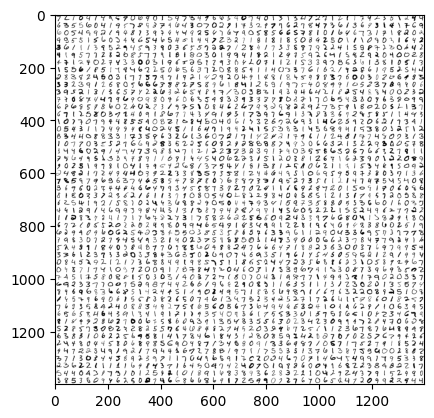

In [9]:
# Save sprite image
plt.imsave(embedding.sprite.image_path, sprite_image, cmap='gray')

# Display the sprite image
plt.imshow(sprite_image, cmap='gray')
plt.show()


In [10]:
# below in cmd
#  tensorboard --logdir C:/Users/kev70/CPS